# Part II - Prosper Lending: Who Are The Most Profitable Borrowers
## by Rofhiwa Kgomo

## Investigation Overview


> This notebook is aimed at looking into the main value drivers of the P2P Lending marketplace Prosper, to ascertain which loans drive the revenues and perform a profiling of the most profitable borrowers.

> The main value drivers are:

>- Number of Originations: indicates the ability to attract borrowers.
>- Servicing Fees and Origination Fees: they comprise the core revenue stream for Porsper. For the aim of this analysis only Origination Fees are going to be considered as woth the data available is not possible to carry out a thorough analysis of Servicing Fees.
>- Lender Returns: they are pivotal to attract lender on the platform. Loan must offer a decent return (given a certain risk level) to attract lenders (Servicing Fees)

> The Origination Fees are the focus of our analysis. They are calucated as a percentage (depending on the risk profile) of the amount requested by the borrower. Therefore the main variables involved are:

>- The Prosper Rating of the borrower.
>- The amount requested by the borrower.


## Dataset Overview

> The Prosper loan dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status and borrower income.

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# load in the dataset into a pandas dataframe
loan_data=pd.read_csv('loan_data')
profitable_loans=pd.read_csv('profitable_loans')


In [8]:
#Set plotting style
plt.style.use('ggplot')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Origination Rate and Loan Amounts

> The distribution of the Originations Fees and the Loan Amounts have the same distribution shape, skewed to the left, as the Origination fee is calculated on the Loan Amount. Hence it one of the drivers of the Origination Fees.

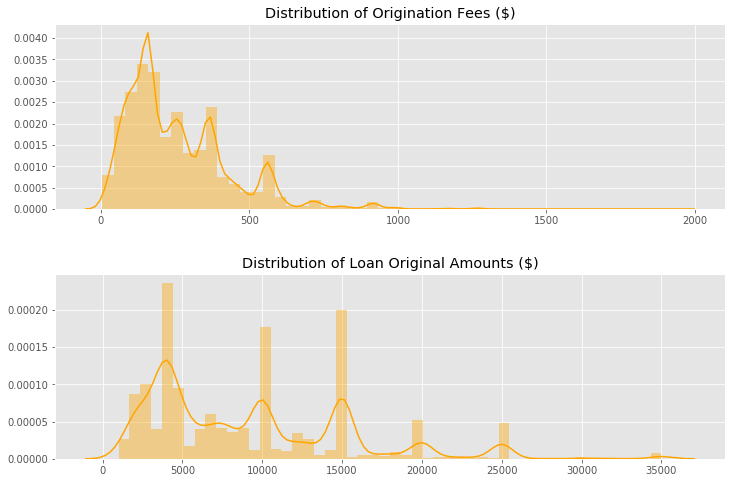

In [9]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)
sns.distplot(np.array(loan_data['OriginationFee']), ax=ax1, color='orange').set_title('Distribution of Origination Fees ($)')
sns.distplot(np.array(loan_data['LoanOriginalAmount']), ax=ax2, color='orange').set_title('Distribution of Loan Original Amounts ($)')
plt.subplots_adjust(hspace=0.35)

### Top loan classes by Originations, Origination Fees and Loan Amounts

>Considering the percentage of origination fees, amount granted and amount of origination, the top six positions are covered by the same classes of loans.

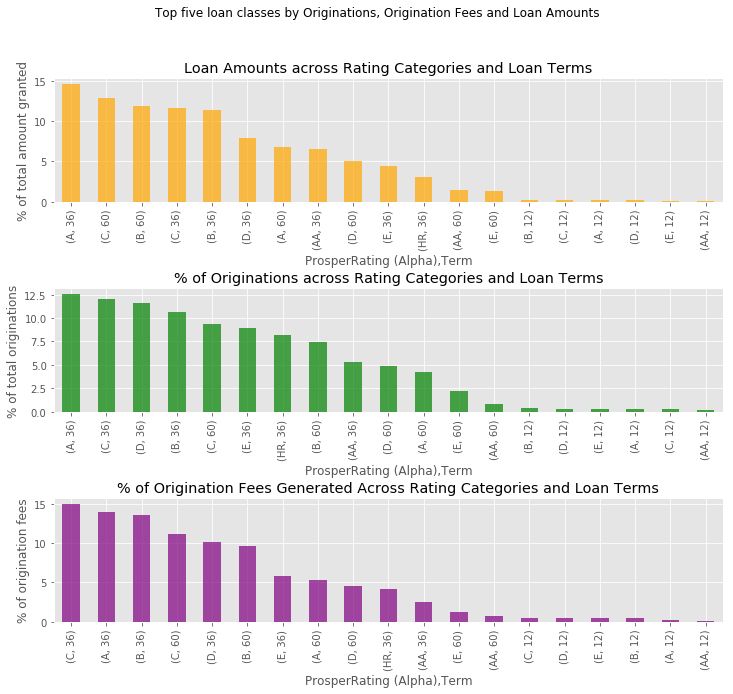

In [10]:
fig=plt.figure(figsize=(12,10))
ax1=fig.add_subplot(3,1,1)
ax2=fig.add_subplot(3,1,2)
ax3=fig.add_subplot(3,1,3)
(loan_data.groupby(['ProsperRating (Alpha)', 'Term'])['LoanOriginalAmount'].sum().sort_values(ascending=False)/loan_data['LoanOriginalAmount'].sum()*100).plot(kind='bar',title=('Loan Amounts across Rating Categories and Loan Terms'), ax=ax1, color='orange', alpha=0.7).set_ylabel('% of total amount granted')
(loan_data.groupby(['ProsperRating (Alpha)', 'Term'])['OriginationFee'].count().sort_values(ascending=False)/loan_data.shape[0]*100).plot(kind='bar', title=('% of Originations across Rating Categories and Loan Terms'), ax=ax2, color='green', alpha=0.7).set_ylabel('% of total originations')
(loan_data.groupby(['ProsperRating (Alpha)', 'Term'])['OriginationFee'].sum().sort_values(ascending=False)/loan_data['OriginationFee'].sum()*100).plot(kind='bar', title=('% of Origination Fees Generated Across Rating Categories and Loan Terms'), ax=ax3, color='purple', alpha=0.7).set_ylabel('% of origination fees')
plt.suptitle('Top five loan classes by Originations, Origination Fees and Loan Amounts')
plt.subplots_adjust(wspace = 0.9, hspace = 0.7)


### Loan Picking


>For the purpose of the analysis the loans that are going to be picked as most profitable are those that generated the highest proportion of Origination Fees which is the main metric to ascertain whether a loan is profitable for Prosper or not.

>The loans that, according to historical data, have generated the most of Origination Fees are: C36, A36, B36, C60, D36 and B60.

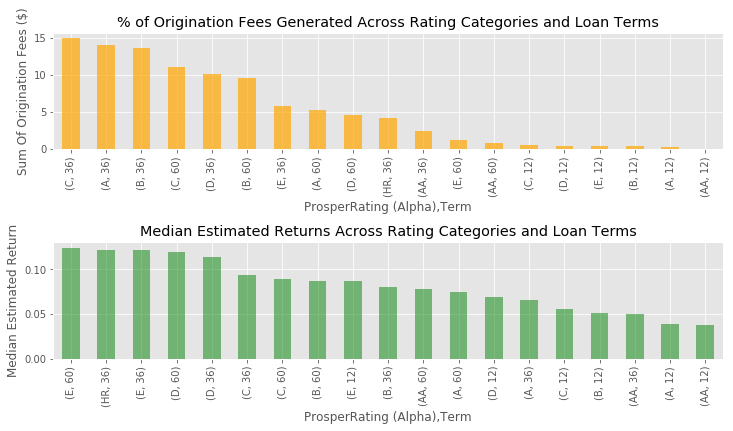

In [11]:
fig=plt.figure(figsize=[20,12])
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)
(loan_data.groupby(['ProsperRating (Alpha)', 'Term'])['OriginationFee'].sum().sort_values(ascending=False)/loan_data['OriginationFee'].sum()*100).plot(kind='bar', figsize=(12,6), ax=ax1, title='% of Origination Fees Generated Across Rating Categories and Loan Terms', color='orange', alpha=0.7).set_ylabel('Sum Of Origination Fees ($)')
loan_data.groupby(['ProsperRating (Alpha)', 'Term'])['EstimatedReturn'].median().sort_values(ascending=False).plot(kind='bar', figsize=(12,6), ax=ax2, title='Median Estimated Returns Across Rating Categories and Loan Terms', color='green', alpha=0.5).set_ylabel('Median Estimated Return')
plt.subplots_adjust(hspace=0.8)

The most profitable loans are the 63.4% of the total loans and generate the 73.4% of the Origination Fees. The most profitable class of loans is A36, which has the lowest risk profile and is the 12.5% of the total loans and generates the 14% of Origination Fees.

Text(0.5,0.98,'Origination Fees and total loan originations across profitable loans and rest of loans')

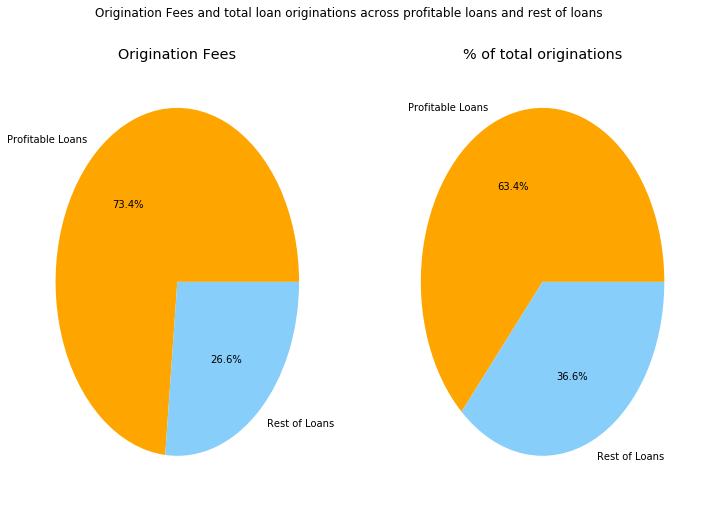

In [13]:
fig=plt.figure(figsize=[12,8])
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.pie([profitable_loans['OriginationFee'].sum(),loan_data['OriginationFee'].sum()-profitable_loans['OriginationFee'].sum()],labels=['Profitable Loans','Rest of Loans'],autopct='%1.1f%%', colors = ['orange', 'lightskyblue'])
ax1.set_title('Origination Fees')
ax2.pie([profitable_loans.shape[0],loan_data.shape[0]-profitable_loans.shape[0]], labels=['Profitable Loans','Rest of Loans'],autopct='%1.1f%%',colors = ['orange', 'lightskyblue'])
ax2.set_title('% of total originations')
fig.suptitle('Origination Fees and total loan originations across profitable loans and rest of loans')

### Median values of Credit History Variables across Rating Categories and Loan Terms


>Regarding the credit history the most discriminating variable is the number of inquiries, which slightly increases as the profile risk increases.

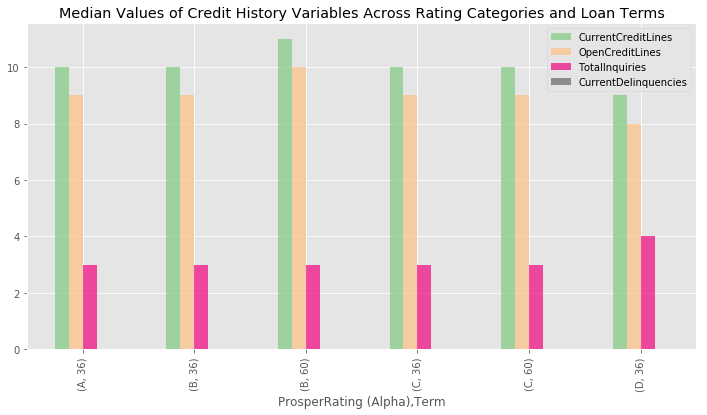

In [14]:
plt.figure(figsize=(12,6))
profitable_loans.groupby(['ProsperRating (Alpha)', 'Term'])[['CurrentCreditLines','OpenCreditLines','TotalInquiries','CurrentDelinquencies']].median().plot(kind='bar',figsize=(12,6), title='Median Values of Credit History Variables Across Rating Categories and Loan Terms', colormap='Accent', alpha=0.7)

### Do Prosper past borrowers have lower Origination Fees?


> The past Prosper borrowers are able to obtain a slightly lower Origination rate, which may be due to the fact tha Prosper has more data available on past borrowers and therefore the chance to perform a better profiling.

Text(0.5,0.98,'Distribution of Origination Fees across past borrowers (orange) and new borrowers (green)')

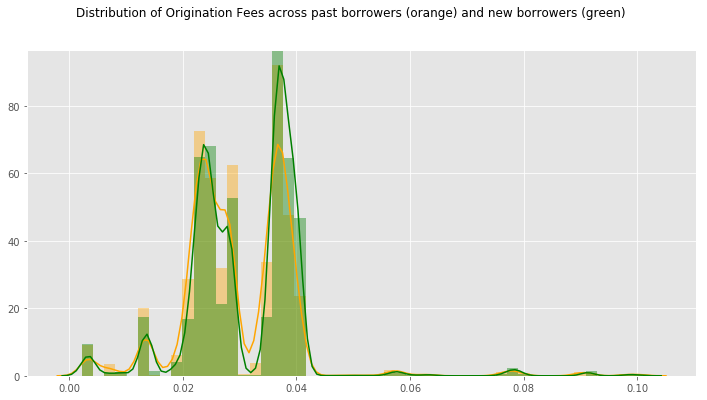

In [15]:
fig=plt.figure(figsize=(12,6))
sns.distplot(np.array(loan_data.query('PastProsperBorrower=="Yes"')['OriginationRate']), color='orange' )
sns.distplot(np.array(loan_data.query('PastProsperBorrower=="No"')['OriginationRate']), color='green')
fig.suptitle('Distribution of Origination Fees across past borrowers (orange) and new borrowers (green)')

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 622526 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
